In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from ift6758.training import BasicModel
from sklearn.model_selection import train_test_split
import pickle
import pandas as pd

In [3]:
# Get Data
train_val = pd.read_pickle('../ift6758/features/TrainValSets.pkl')
X_all = train_val.drop(['is_goal'], axis=1)
y_all = train_val['is_goal']

# Split into train val
X_train, X_val, y_train, y_val = train_test_split(X_all, y_all, test_size=0.3, random_state=42)

In [4]:
modelsDict = {
    'LogisticReg_distance': BasicModel(pickle.load(open('../train/LogisticReg_distance/model.pkl', 'rb'))).get_pred_proba(X_val['distance']),
    'LogisticReg_angle': BasicModel(pickle.load(open('../train/LogisticReg_angle/model.pkl', 'rb'))).get_pred_proba(X_val['angle']),
    'LogisticReg_distance-angle': BasicModel(pickle.load(open('../train/LogisticReg_distance-angle/model.pkl', 'rb'))).get_pred_proba(X_val[['distance', 'angle']])
}

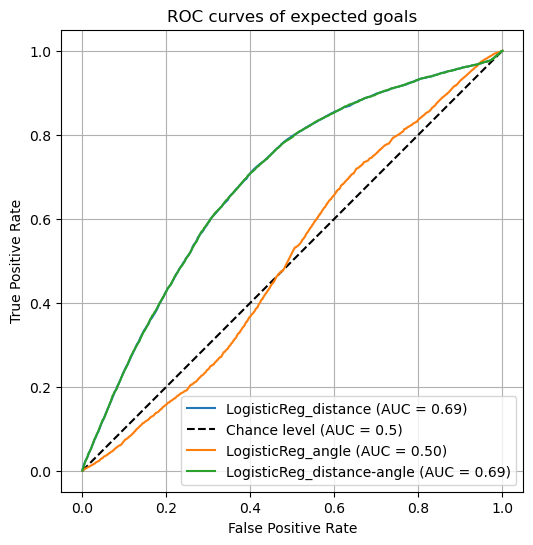

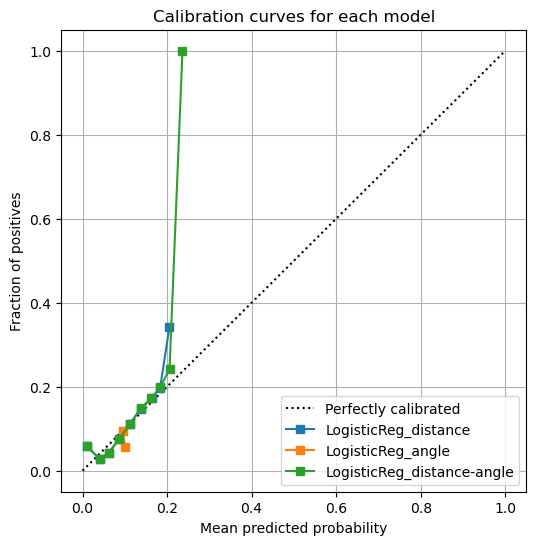

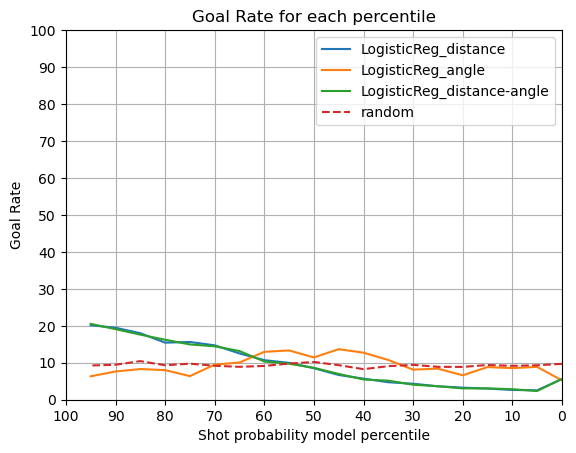

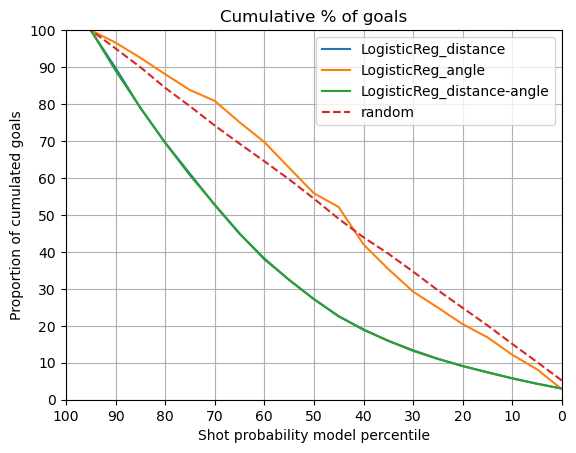

In [5]:
from ift6758.training.plot import plot_all
plot_all(modelsDict, y_val)